1. Si scriva un programma main.cpp che generi N punti pseudo-casuali distribuiti uniformemente nel
volume compreso nel seguente intervallo:
x  (0, e)
y 
(
− π
2 , π
2
)
z  (0, fmax)
dove fmax è il valore massimo che la funzione f (x, y) assume nel dominio in (x, y) dell’intervallo
stesso, mentre il valore di N viene passato al programma da linea di comando con il comando di
esecuzione

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import ExtendedUnbinnedNLL,UnbinnedNLL,LeastSquares,BinnedNLL
from IPython.display import Latex
# from scipy.stats import 

f (x, y) = e−x cos y

In [78]:
def f(x,y):
    return np.exp(-x)*np.cos(y)

In [79]:
def rnd_data(xmin,xmax,ymin,ymax,zmin,zmax):
    '''genera punti randomici dentro i limiti richiesti'''
    x = np.random.uniform(xmin,xmax)
    y = np.random.uniform(ymin, ymax)
    z = np.random.uniform(0,zmax)

    return x,y,z

In [80]:
N = 1000
fmax = 1
data = [rnd_data(xmin=0,xmax=np.e,ymin=-.5*np.pi,ymax=.5*np.pi,zmin=0,zmax=fmax) for i in range(N)]

In [81]:
def calc_integral(N,xmin=0,xmax=np.e,ymin=-.5*np.pi,ymax=.5*np.pi,zmin=0,zmax=1):

    counter = 0
    for i in range(N):
        x,y,z = rnd_data(xmin,xmax,ymin,ymax,zmin,zmax)
        if f(x,y) < z:
            counter +=1
    
    V = (xmax-xmin)*(ymax-ymin)*(zmax-zmin)
    p = counter/N
    sigma = np.sqrt((V**2/N)*p*(1-p))

    return V*p, sigma

In [82]:
print(calc_integral(10000,1))

(4.784912686835856, 0.017129642899378343)


In [89]:
def toy(N,n=100):
    results = np.empty((2,N))

    for i in range(N):
        data, sigma = calc_integral(n,xmin=0,xmax=np.e,ymin=-.5*np.pi,ymax=.5*np.pi,zmin=0,zmax=1)
        results[0,i] = data
        results[1,i] = sigma

    return results

In [97]:
res = toy(1000,n=300)

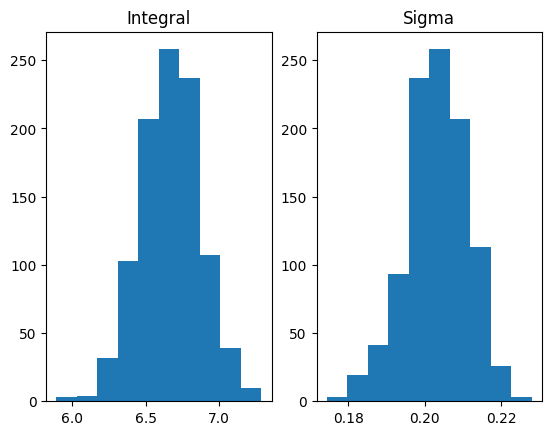

In [98]:
fig,ax = plt.subplots(1,2)

ax[0].hist(res[0])
ax[1].hist(res[1])

ax[0].set_title("Integral")
ax[1].set_title("Sigma")
plt.show()

In [103]:
print(np.std(res[0]))

0.20632956144839137


In [104]:
datas,sigmas = [],[]
for i in range(1,N):
    data, sigma = calc_integral(i,xmin=0,xmax=np.e,ymin=-.5*np.pi,ymax=.5*np.pi,zmin=0,zmax=1)
    datas.append(data)
    sigmas.append(sigma)

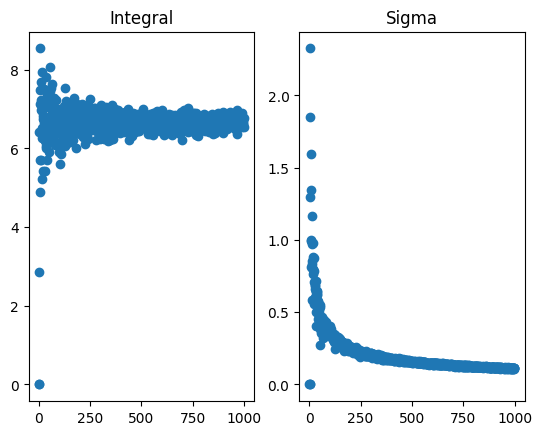

In [107]:
fig,ax = plt.subplots(1,2)

ax[0].scatter(range(1,N),datas)
ax[1].scatter(range(1,N),sigmas)

ax[0].set_title("Integral")
ax[1].set_title("Sigma")
plt.show()